In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [ ]:
%pip install pyrdf2vec==0.2.3
%pip install torch==1.8.1
%pip install wordcloud

In [3]:
import torch

model = torch.load('./odeuropa_transe10000/trained_model.pkl')

/home/ehrhart/.conda/envs/thibault-kg-embeddings/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from pykeen.triples.triples_factory import TriplesFactory
tf = TriplesFactory.from_path_binary('./odeuropa_transe10000/training_triples')

In [8]:
tf.entity_id_to_label

{0: 'http://data.odeuropa.eu/actor/0005efc4-fd2b-5467-9527-35b8e8cf87c7',
 1: 'http://data.odeuropa.eu/actor/000b4cba-c707-524c-a089-5807e4fae685',
 2: 'http://data.odeuropa.eu/actor/001f7291-977e-5a5b-98f5-a44598f25d2d',
 3: 'http://data.odeuropa.eu/actor/00298271-34e1-5059-9fd9-0be38f0f3485',
 4: 'http://data.odeuropa.eu/actor/00319338-bc0a-58f8-a249-11970436441b',
 5: 'http://data.odeuropa.eu/actor/00418ef9-c41c-56f9-87a3-c866d7267814',
 6: 'http://data.odeuropa.eu/actor/004d8045-4bd2-5f1a-9f52-5aa90d9ad73d',
 7: 'http://data.odeuropa.eu/actor/0051f994-ee07-5f07-936b-4def10c721f7',
 8: 'http://data.odeuropa.eu/actor/005466b5-8847-5e53-93bf-e2d676ad55e3',
 9: 'http://data.odeuropa.eu/actor/00603b95-1e46-5936-bacd-360488182d77',
 10: 'http://data.odeuropa.eu/actor/00759b02-75d7-55ec-9639-32b9e4d82813',
 11: 'http://data.odeuropa.eu/actor/0085a24f-e7a5-5da4-8b1a-813266ad2298',
 12: 'http://data.odeuropa.eu/actor/0093fe28-9088-5727-a940-4ae7a0f407f0',
 13: 'http://data.odeuropa.eu/actor

In [16]:
tf.relation_id_to_label

{0: '%5Eecrm_P140_assigned_attribute_to%20%2F%20ecrm_P141_assigned.csv',
 1: '%5Ereo_readP27%20%2F%20ecrm_P137_exemplifies.csv',
 2: 'ecrm_P67_refers_to.csv',
 3: 'ecrm_P7_took_place_at%20%2F%20ecrm_P137_exemplifies.csv',
 4: 'ecrm_P7_took_place_at.csv',
 5: 'ecrm_P89_falls_within.csv',
 6: 'gn_parentCountry.csv',
 7: 'od_F1_generated%20%2F%5E%20od_F2_perceived.csv',
 8: 'od_F1_generated.csv',
 9: 'od_F2_perceived.csv',
 10: 'od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv',
 11: 'od_F4_had_carrier%20%2F%20ecrm_P137_exemplifies.csv',
 12: 'od_F5_involved_gesture%20%2F%20ecrm_P137_exemplifies.csv',
 13: 'od_F6_evoked%20%2F%20ecrm_P137_exemplifies.csv',
 14: 'reo_readP1.csv',
 15: 'schema_author.csv',
 16: 'schema_genre.csv',
 17: 'schema_locationCreated.csv',
 18: 'skos_broader.csv',
 19: 'skos_member.csv',
 20: 'skos_narrower.csv',
 21: 'skos_related.csv'}

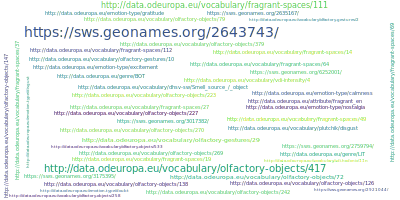

In [14]:
tf.entity_word_cloud()

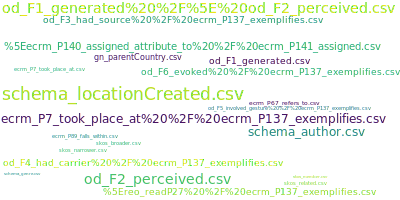

In [15]:
tf.relation_word_cloud()

In [12]:
from pykeen import predict
predict.predict_target(
  model=model,
  head="http://data.odeuropa.eu/emission/43f393f6-896f-53fa-8866-397a26034b0f",
  relation="od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv",
  triples_factory=tf,
).df[1:].head(5).set_index('tail_label')['score'].to_dict()

{'http://data.odeuropa.eu/vocabulary/olfactory-objects/124': -13.126398086547852,
 'http://data.odeuropa.eu/vocabulary/olfactory-objects/425': -13.17851448059082,
 'http://data.odeuropa.eu/vocabulary/olfactory-objects/237': -13.203042984008789,
 'http://data.odeuropa.eu/vocabulary/olfactory-objects/113': -13.227006912231445,
 'http://data.odeuropa.eu/vocabulary/olfactory-objects/8': -13.279397964477539}

In [11]:
from pykeen import predict
predict.predict_target(
  model=model,
  relation="od_F1_generated.csv",
  tail="http://data.odeuropa.eu/emission/09305369-140a-5355-9b56-43c2f5973e71",
  triples_factory=tf,
).df[1:].head(5).set_index('head_label')['score'].to_dict()

{'http://data.odeuropa.eu/experience/618aceb9-2688-5f63-b7b5-63f5c6c1d57a': -11.032258033752441,
 'http://data.odeuropa.eu/experience/4cb0082c-8c0b-5bd7-8498-ea4dd2499e03': -11.233701705932617,
 'http://data.odeuropa.eu/experience/ced12e3e-8ef3-5b67-bacd-99d7fb19a436': -11.337757110595703,
 'http://data.odeuropa.eu/emission/2404cb8f-f384-51b3-8ec5-4fc1011a8f86': -11.365745544433594,
 'http://data.odeuropa.eu/experience/4ff34884-5bbf-5122-bc81-fdb8762bcb51': -11.436321258544922}

Observations:
* These experience/emission links do not work
* Was the embedding computed before or after removing the unnecessary predicates?

In [ ]:
def parse_tab_separated_data(file_path):
    result = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.replace("\n", "")
            tokens = line.split(sep="\t")
            result.append(tokens)
    return result

### Evaluation on direct concepts

In [10]:
from tqdm import tqdm
from pykeen import predict
import logging


logging.getLogger("pykeen.triples.triples_factory").disabled = True
logging.getLogger("torch_max_mem.api").disabled = True

evaluation_dataset = parse_tab_separated_data("data/odeuropa-od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv.txt")
correct_t = 0
total_t = 0
for triple in tqdm(evaluation_dataset):
    total_t += 1
    h, l, t = triple
    triples = [(h, 'od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv', concept) for concept in concepts]
    t_pack = predict.predict_triples(model, triples=triples, triples_factory=tf)
    t_pred = t_pack.process(factory=tf)
    tail_labels = t_pred.df.sort_values('score', ascending=False)['tail_label']
    if tail_labels.empty:
        continue
    t_result = tail_labels.iloc[0]
    if t == t_result:
        correct_t += 1
print(f"Tail prediction accuracy: {correct_t} / {total_t} ({correct_t / total_t})")

logging.getLogger("pykeen.triples.triples_factory").disabled = False
logging.getLogger("torch_max_mem.api").disabled = False

  0%|          | 0/27534 [00:00<?, ?it/s]

100%|██████████| 27534/27534 [02:37<00:00, 174.82it/s]

Tail prediction accuracy: 4932 / 27534 (0.17912399215515362)


### Evaluation on top-level concepts

In [ ]:
import pandas as pd
top_concepts = pd.read_csv('data/top-concepts.csv')
concepts = list(set(top_concepts['sub'].to_list()))

In [8]:
from tqdm import tqdm
from pykeen import predict

logging.getLogger("pykeen.triples.triples_factory").disabled = True
logging.getLogger("torch_max_mem.api").disabled = True

evaluation_dataset = parse_tab_separated_data("data/odeuropa-od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv.txt")
correct_t = 0
total_t = 0
for triple in tqdm(evaluation_dataset):
    total_t += 1
    h, l, t = triple
    triples = [(h, 'od_F3_had_source%20%2F%20ecrm_P137_exemplifies.csv', concept) for concept in concepts]
    t_pack = predict.predict_triples(model, triples=triples, triples_factory=tf)
    t_pred = t_pack.process(factory=tf)
    tail_labels = t_pred.df.sort_values('score', ascending=False)['tail_label']
    if tail_labels.empty:
        continue
    t_result = tail_labels.iloc[0]
    top_t = top_concepts[top_concepts['sub'] == t]['top'].to_list()
    top_t_result = top_concepts[top_concepts['sub'] == t_result]['top'].to_list()
    if any(item in top_t for item in top_t_result):
        correct_t += 1
print(f"Tail prediction accuracy: {correct_t} / {total_t} ({correct_t / total_t})")

logging.getLogger("pykeen.triples.triples_factory").disabled = False
logging.getLogger("torch_max_mem.api").disabled = False

100%|██████████| 27534/27534 [02:42<00:00, 169.47it/s]

Tail prediction accuracy: 6793 / 27534 (0.24671315464516597)
